<a href="https://colab.research.google.com/github/hissain/mlworks/blob/main/codes/GPT_2_Trainer_Powerbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect with Drive

In [ ]:
# prompt: Connect with drive, change directory to /content/gdrive/My Drive/BRTC/Deep Learning/Notebooks/GPT 2 Training

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/My\ Drive/BRTC/Deep\ Learning/Notebooks/GPT\ 2\ Training
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/BRTC/Deep Learning/Notebooks/GPT 2 Training
 edu_fineweb10B  'GPT 2 Powerbook.ipynb'   hellaswag.py   input.txt   log   __pycache__


In [ ]:
!pip install tiktoken

# Lets Start with a Reference Implementation

In [ ]:
from transformers import GPT2LMHeadModel

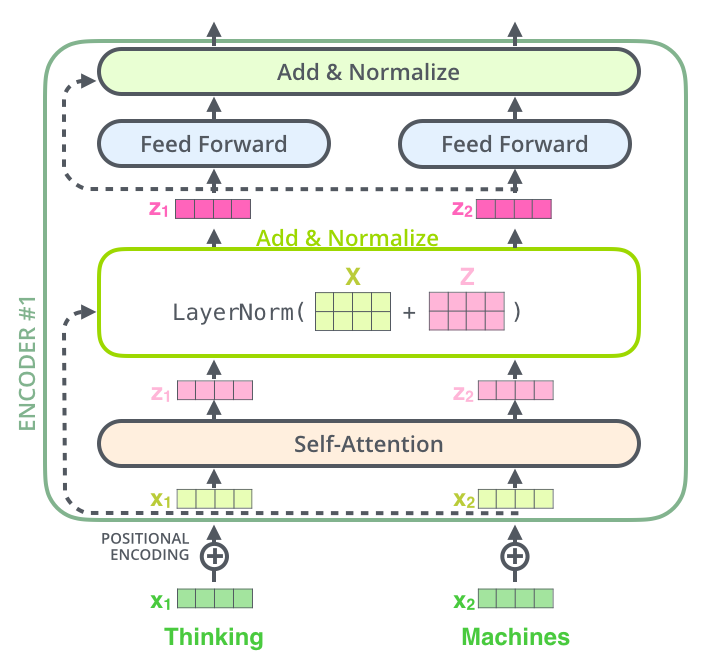

In [ ]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
# Use view(-1) to reshape the tensor to a single dimension
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

In [ ]:
print(sd_hf["lm_head.weight"].shape)
print(sd_hf["transformer.wte.weight"].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [ ]:
(sd_hf["lm_head.weight"] == sd_hf["transformer.wte.weight"]).all()

tensor(True)

In [ ]:
print(sd_hf["lm_head.weight"].data_ptr())
print(sd_hf["transformer.wte.weight"].data_ptr())

136922914275392
136922914275392


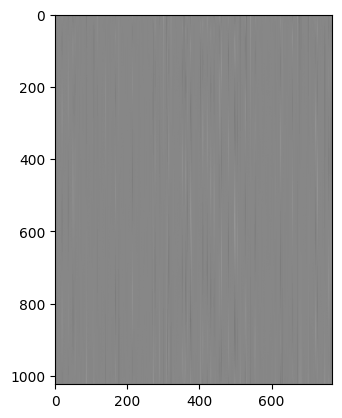

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

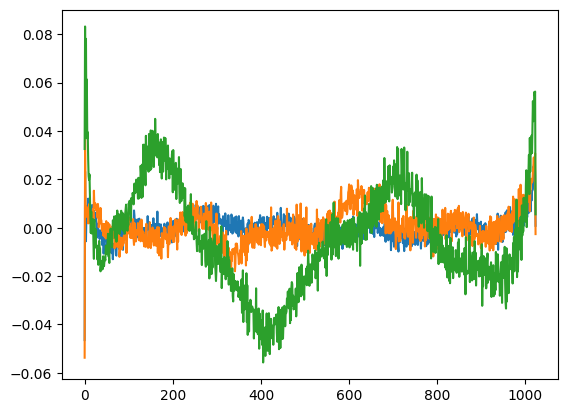

In [ ]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 644])

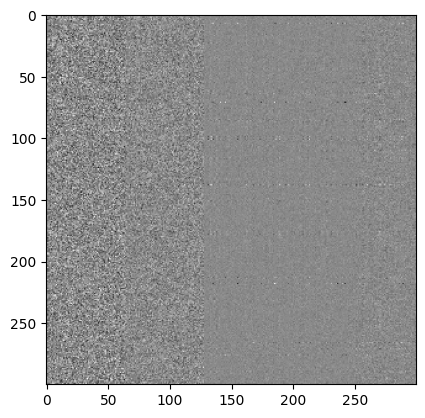

In [ ]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="gray")

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
# generator("This deep learning course after office is so boring", max_length=30, num_return_sequences=5)
generator("Deep Learning", max_length=30, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Deep Learning: Deep Learning in the Internet Age\n\nI mentioned in a previous post that in the beginning, there was a problem with the notion of'},
 {'generated_text': 'Deep Learning\n\nWe use distributed learning to solve the real world problem of how to predict the future over many generations and how to improve outcomes over time'},
 {'generated_text': 'Deep Learning\n\nAn early version of this codebase uses a mix of Python implementations, mostly described with reference to the Python interpreter implementation. The code'},
 {'generated_text': 'Deep Learning\n\nWhile many businesses use this technique, it\'s a different story: In fact, the concept could have benefits for productivity. "In'},
 {'generated_text': 'Deep Learning Model (also known as the CFTM) for a number of important aspects of real-time prediction. First, it allows to compute'}]

In [ ]:
# prompt: check for cuda and adjust device var accordingly
import torch

# Check if CUDA is available
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("Using CUDA device:", torch.cuda.get_device_name(0))
else:
  device = torch.device("cpu")
  print("Using CPU device")


Using CUDA device: Tesla T4


In [ ]:
# let's instead sample manually
from torch.nn import functional as F
import tiktoken

model = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
model.eval()
model.to(device)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

enc = tiktoken.get_encoding('gpt2')
# tokens = enc.encode("This deep learning course after office is so boring")
tokens = enc.encode("Deep Learning")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(5, 1)
x = tokens.to(device)

# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50 (huggingface pipeline default)
        # topk_probs here becomes (5, 50), topk_indices is (5, 50)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # select a token from the top-k probabilities
        # note: multinomial does not demand the input to sum to 1
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text

for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

> Deep Learning

What is a training-induced optimization performance regression? A recent paper has shown that deep learning models of the visual memory are able to
> Deep Learning Learning System

A single machine AI system is all it takes to extract data from data in the way the human brain does. It is
> Deep Learning and the Use of Convolutional Neural Networks at the University of Illinois at Urbana-Champaign

David N. Bres
> Deep Learning: Part 1, Part 2

What The Heck Is A Good Part? With This: The Difference Between Learning Learning and Part I

> Deep Learning for Realtime, Realtime Search For Applications by Tom Hines, A.M.S. (Department of Computer Science, Boston University


#Define The Model

In [ ]:
import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
from hellaswag import render_example, iterate_examples

In [ ]:
class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1
        # regularization
        self.n_head = config.n_head
        self.n_embd = config.n_embd

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # nh is "number of heads", hs is "head size", and C (number of channels) = nh * hs
        # e.g. in GPT-2 (124M), nh=12, hs=64, so nh*hs=C=768 channels in the Transformer
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        y = F.scaled_dot_product_attention(q, k, v, is_causal=True) # flash attention
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        # output projection
        y = self.c_proj(y)
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x

class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x

@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension

class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config

        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

        # weight sharing scheme
        self.transformer.wte.weight = self.lm_head.weight

        # init params
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            std = 0.02
            if hasattr(module, 'NANOGPT_SCALE_INIT'):
                std *= (2 * self.config.n_layer) ** -0.5
            torch.nn.init.normal_(module.weight, mean=0.0, std=std)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        # idx is of shape (B, T)
        B, T = idx.size()
        assert T <= self.config.block_size, f"Cannot forward sequence of length {T}, block size is only {self.config.block_size}"
        # forward the token and posisition embeddings
        pos = torch.arange(0, T, dtype=torch.long, device=idx.device) # shape (T)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (T, n_embd)
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (B, T, n_embd)
        x = tok_emb + pos_emb
        # forward the blocks of the transformer
        for block in self.transformer.h:
            x = block(x)
        # forward the final layernorm and the classifier
        x = self.transformer.ln_f(x)
        logits = self.lm_head(x) # (B, T, vocab_size)
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        return logits, loss

    @classmethod
    def from_pretrained(cls, model_type):
        """Loads pretrained GPT-2 model weights from huggingface"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model

    def configure_optimizers(self, weight_decay, learning_rate, device_type):
        # start with all of the candidate parameters (that require grad)
        param_dict = {pn: p for pn, p in self.named_parameters()}
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # create optim groups. Any parameters that is 2D will be weight decayed, otherwise no.
        # i.e. all weight tensors in matmuls + embeddings decay, all biases and layernorms don't.
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        if master_process:
            print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
            print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")
        # Create AdamW optimizer and use the fused version if it is available
        fused_available = 'fused' in inspect.signature(torch.optim.AdamW).parameters
        use_fused = fused_available and device_type == "cuda"
        if master_process:
            print(f"using fused AdamW: {use_fused}")
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=(0.9, 0.95), eps=1e-8, fused=use_fused)
        return optimizer

In [ ]:
# standard deviation grows inside the residual stream
x = torch.zeros(768)
n = 100 # e.g. 100 layers
for i in range(n):
    x += torch.randn(768)
    # x += n**-0.5 * torch.randn(768)

print(x.std())

tensor(9.8504)


## Token Description
Example Tokens
Here are some examples of how text is tokenized in GPT-2:

Common words: "hello" -> ["hello"]

Rare words: "supercalifragilisticexpialidocious" -> ["super", "cal", "if", "rag", "il", "istic", "ex", "pial", "idocious"]

Subword splits: "unhappiness" -> ["un", "happiness"]

Special characters: "2021!" -> ["2021", "!"]

In [ ]:
from transformers import GPT2Tokenizer

# Load GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Example text
text = "Hello, how are you?"

# Tokenize text
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['Hello', ',', 'Ġhow', 'Ġare', 'Ġyou', '?']
Token IDs: [15496, 11, 703, 389, 345, 30]


## Flash Attention
https://arxiv.org/abs/2205.14135
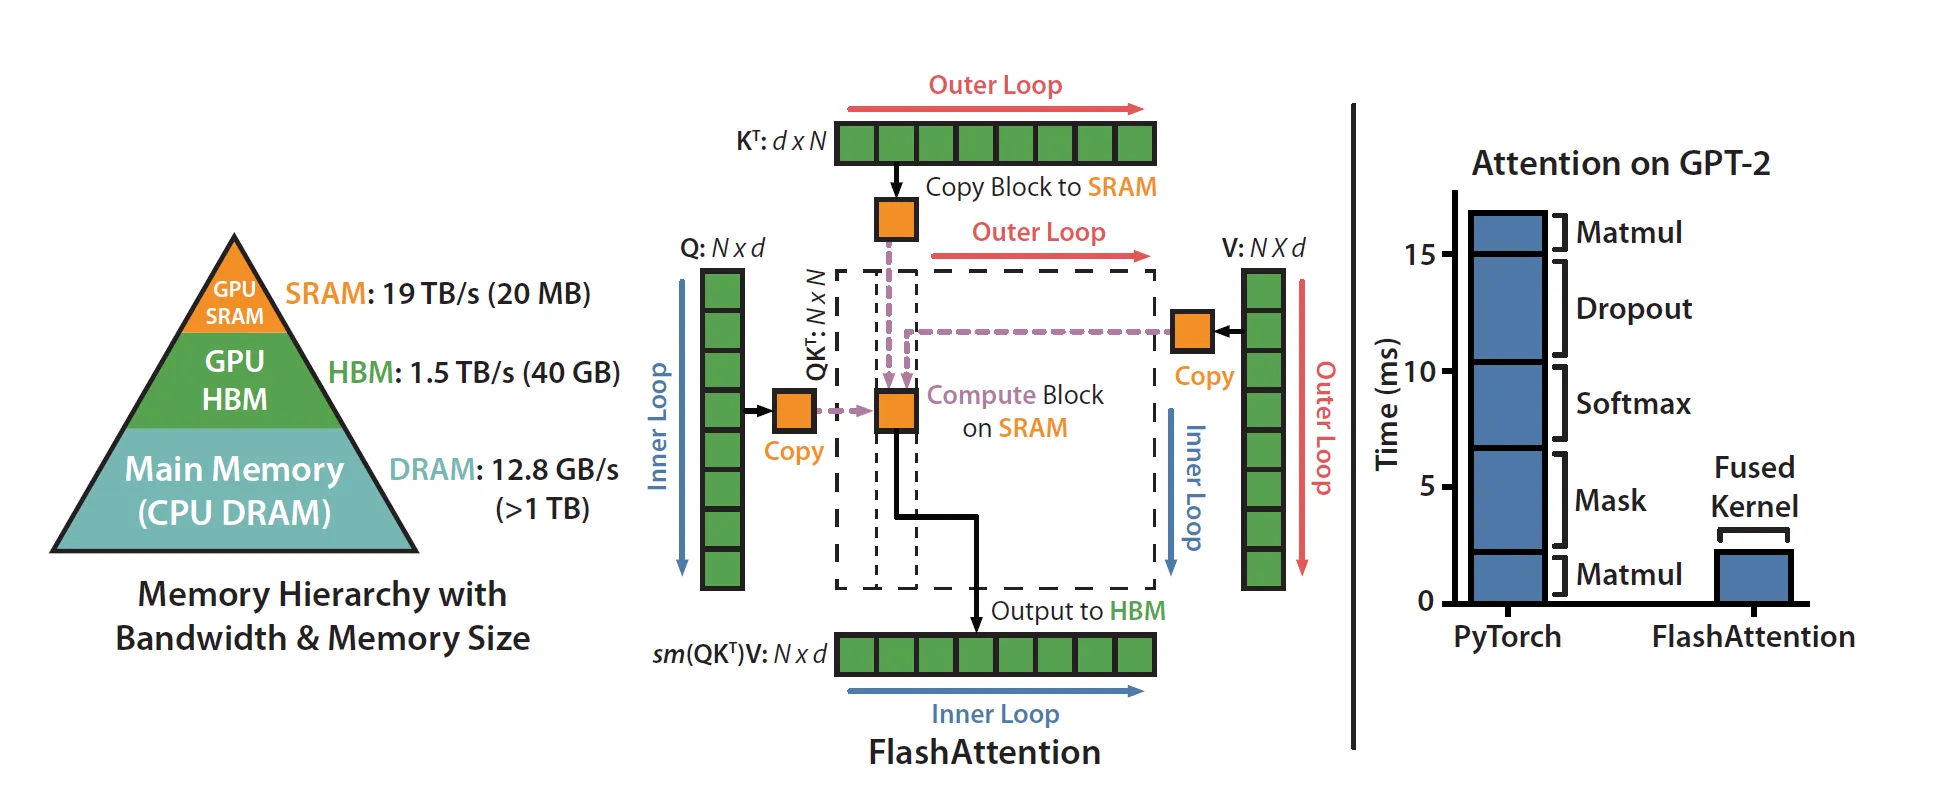

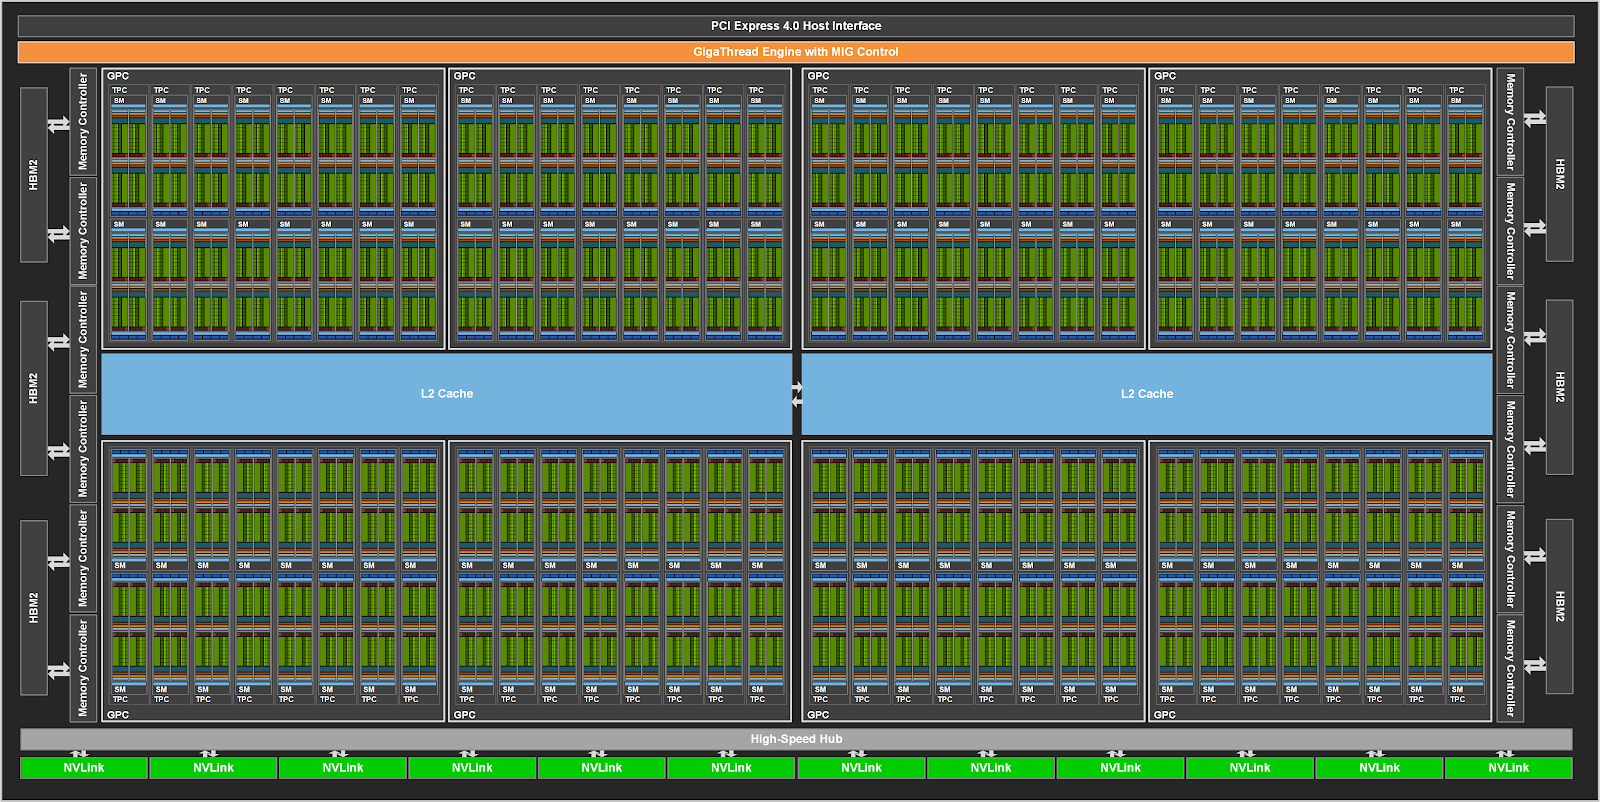

# Load Custom Model with Pretrained Weights

In [ ]:
from torch.nn import functional as F
import tiktoken

model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
model.eval()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

enc = tiktoken.get_encoding('gpt2')
# tokens = enc.encode("This deep learning course after office is so boring")
tokens = enc.encode("Deep Learning")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(5, 1)
x = tokens.to(device)

# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50 (huggingface pipeline default)
        # topk_probs here becomes (5, 50), topk_indices is (5, 50)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # select a token from the top-k probabilities
        # note: multinomial does not demand the input to sum to 1
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text

for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

loading weights from pretrained gpt: gpt2
> Deep Learning

What is a training-induced optimization performance regression? A recent paper has shown that deep learning models of the visual memory are able to
> Deep Learning Learning System

A single machine AI system is all it takes to extract data from data in the way the human brain does. It is
> Deep Learning and the Use of Convolutional Neural Networks at the University of Illinois at Urbana-Champaign

David N. Bres
> Deep Learning: Part 1, Part 2

What The Heck Is A Good Part? With This: The Difference Between Learning Learning and Part I

> Deep Learning for Realtime, Realtime Search For Applications by Tom Hines, A.M.S. (Department of Computer Science, Boston University


In [ ]:
with open('input.txt', 'r') as f:
    text = f.read()
data = text[:1000] # first 1,000 characters
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [ ]:
import torch
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


# FineWeb Edu Dataset


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
"""
FineWeb-Edu dataset (for srs pretraining)
https://huggingface.co/datasets/HuggingFaceFW/fineweb-edu
Downloads and tokenizes the data and saves data shards to disk.
Run simply as:
$ python fineweb.py
Will save shards to the local directory "edu_fineweb10B".
"""

import os
import multiprocessing as mp
import numpy as np
from datasets import load_dataset # pip install datasets
from tqdm import tqdm # pip install tqdm

# ------------------------------------------
local_dir = "edu_fineweb10B"
remote_name = "sample-10BT"
shard_size = int(20000) # 100M tokens per shard, total of 100 shards

# create the cache the local directory if it doesn't exist yet
DATA_CACHE_DIR = os.path.join(os.getcwd() if '__file__' not in locals() else os.path.dirname(__file__), local_dir)
os.makedirs(DATA_CACHE_DIR, exist_ok=True)

# download the dataset
# fw = load_dataset("HuggingFaceFW/fineweb-edu", name=remote_name, split="train")
fw = load_dataset("nampdn-ai/mini-fineweb", name=remote_name, split="sample10bt")

Resolving data files:   0%|          | 0/7926 [00:00<?, ?it/s]

Generating sample10bt split: 0 examples [00:00, ? examples/s]

In [ ]:
print(fw.shape)
fw = fw.select(range(10000))
print(fw.shape)
shard_size = int(100000)

(207148, 4)
(10000, 4)


In [ ]:
# init the tokenizer
import tiktoken

enc = tiktoken.get_encoding("gpt2")
eot = enc._special_tokens['<|endoftext|>'] # end of text token
def tokenize(doc):
    # tokenizes a single document and returns a numpy array of uint16 tokens
    tokens = [eot] # the special <|endoftext|> token delimits all documents
    tokens.extend(enc.encode_ordinary(doc["text"]))
    tokens_np = np.array(tokens)
    assert (0 <= tokens_np).all() and (tokens_np < 2**16).all(), "token dictionary too large for uint16"
    tokens_np_uint16 = tokens_np.astype(np.uint16)
    return tokens_np_uint16

def write_datafile(filename, tokens_np):
    np.save(filename, tokens_np)

# tokenize all documents and write output shards, each of shard_size tokens (last shard has remainder)
nprocs = max(1, os.cpu_count()//2)
with mp.Pool(nprocs) as pool:
    shard_index = 0
    # preallocate buffer to hold current shard
    all_tokens_np = np.empty((shard_size,), dtype=np.uint16)
    token_count = 0
    progress_bar = None
    for tokens in pool.imap(tokenize, fw, chunksize=16):

        # is there enough space in the current shard for the new tokens?
        if token_count + len(tokens) < shard_size:
            # simply append tokens to current shard
            all_tokens_np[token_count:token_count+len(tokens)] = tokens
            token_count += len(tokens)
            # update progress bar
            if progress_bar is None:
                progress_bar = tqdm(total=shard_size, unit="tokens", desc=f"Shard {shard_index}")
            progress_bar.update(len(tokens))
        else:
            # write the current shard and start a new one
            split = "val" if shard_index == 0 else "train"
            filename = os.path.join(DATA_CACHE_DIR, f"edufineweb_{split}_{shard_index:06d}")
            # split the document into whatever fits in this shard; the remainder goes to next one
            remainder = shard_size - token_count
            progress_bar.update(remainder)
            all_tokens_np[token_count:token_count+remainder] = tokens[:remainder]
            write_datafile(filename, all_tokens_np)
            shard_index += 1
            progress_bar = None
            # populate the next shard with the leftovers of the current doc
            all_tokens_np[0:len(tokens)-remainder] = tokens[remainder:]
            token_count = len(tokens)-remainder

    # write any remaining tokens as the last shard
    if token_count != 0:
        split = "val" if shard_index == 0 else "train"
        filename = os.path.join(DATA_CACHE_DIR, f"edufineweb_{split}_{shard_index:06d}")
        write_datafile(filename, all_tokens_np[:token_count])

Shard 1:  97%|█████████▋| 97491/100000 [00:00<00:00, 822895.99tokens/s]

Shard 2:  95%|█████████▍| 94510/100000 [00:00<00:00, 460579.43tokens/s]

Shard 4: 100%|█████████▉| 99961/100000 [00:00<00:00, 1146092.02tokens/s]

Shard 3: 100%|█████████▉| 99986/100000 [00:00<00:00, 311916.00tokens/s]

Shard 5: 100%|█████████▉| 99699/100000 [00:00<00:00, 339255.96tokens/s]

Shard 8: 100%|█████████▉| 99952/100000 [00:00<00:00, 1108699.12tokens/s]

Shard 9:  97%|█████████▋| 96561/100000 [00:00<00:00, 398879.01tokens/s]

Shard 12: 100%|█████████▉| 99966/100000 [00:00<00:00, 297012.92tokens/s]

Shard 15: 100%|█████████▉| 99603/100000 [00:00<00:00, 957518.36tokens/s]

Shard 23: 100%|█████████▉| 99654/100000 [00:00<00:00, 991127.24tokens/s]

Shard 24: 100%|█████████▉| 99633/100000 [00:00<00:00, 390899.48tokens/s]

Shard 30: 100%|█████████▉| 99784/100000 [00:00<00:00, 378520.83tokens/s]

Shard 33:  98%|█████████▊| 98253/100000 [00:00<00:00, 758722.11tokens/s]

Shard 38: 100%|█████████▉| 99671/100000 [00

# Define Data Loader

In [ ]:
import tiktoken
import numpy as np

def load_tokens(filename):
    npt = np.load(filename)
    npt = npt.astype(np.int32) # added after video
    ptt = torch.tensor(npt, dtype=torch.long)
    return ptt

class DataLoaderLite:
    def __init__(self, B, T, process_rank, num_processes, split):
        self.B = B
        self.T = T
        self.process_rank = process_rank
        self.num_processes = num_processes
        assert split in {'train', 'val'}

        # get the shard filenames
        data_root = "edu_fineweb10B"
        shards = os.listdir(data_root)
        shards = [s for s in shards if split in s]
        shards = sorted(shards)
        shards = [os.path.join(data_root, s) for s in shards]
        self.shards = shards
        assert len(shards) > 0, f"no shards found for split {split}"
        if master_process:
            print(f"found {len(shards)} shards for split {split}")
        self.reset()

    def reset(self):
        # state, init at shard zero
        self.current_shard = 0
        self.tokens = load_tokens(self.shards[self.current_shard])
        self.current_position = self.B * self.T * self.process_rank

    def next_batch(self):
        B, T = self.B, self.T
        buf = self.tokens[self.current_position : self.current_position+B*T+1]
        x = (buf[:-1]).view(B, T) # inputs
        y = (buf[1:]).view(B, T) # targets
        # advance the position in the tensor
        self.current_position += B * T * self.num_processes
        # if loading the next batch would be out of bounds, advance to next shard
        if self.current_position + (B * T * self.num_processes + 1) > len(self.tokens):
            self.current_shard = (self.current_shard + 1) % len(self.shards)
            self.tokens = load_tokens(self.shards[self.current_shard])
            self.current_position = B * T * self.process_rank
        return x, y

# -----------------------------------------------------------------------------
# helper function for HellaSwag eval
# takes tokens, mask, and logits, returns the index of the completion with the lowest loss

def get_most_likely_row(tokens, mask, logits):
    # evaluate the autoregressive loss at all positions
    shift_logits = (logits[..., :-1, :]).contiguous()
    shift_tokens = (tokens[..., 1:]).contiguous()
    flat_shift_logits = shift_logits.view(-1, shift_logits.size(-1))
    flat_shift_tokens = shift_tokens.view(-1)
    shift_losses = F.cross_entropy(flat_shift_logits, flat_shift_tokens, reduction='none')
    shift_losses = shift_losses.view(tokens.size(0), -1)
    # now get the average loss just for the completion region (where mask == 1), in each row
    shift_mask = (mask[..., 1:]).contiguous() # we must shift mask, so we start at the last prompt token
    masked_shift_losses = shift_losses * shift_mask
    # sum and divide by the number of 1s in the mask
    sum_loss = masked_shift_losses.sum(dim=1)
    avg_loss = sum_loss / shift_mask.sum(dim=1)
    # now we have a loss for each of the 4 completions
    # the one with the lowest loss should be the most likely
    pred_norm = avg_loss.argmin().item()
    return pred_norm


# Training Scenario 1: CPU

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2048 # 2**19, ~0.5M, in number of tokens
B = 2 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

# torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = False # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 20
max_steps = 480 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cpu
total desired batch size: 2048
=> calculated gradient accumulation steps: 1
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: False


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)
    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        # with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
        logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    # torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.231833 | lr 3.0000e-05 | norm: 10.7412 | dt: 32962.00ms | tok/sec: 62.13
step     1 | loss: 9.757121 | lr 6.0000e-05 | norm: 7.7954 | dt: 32799.86ms | tok/sec: 62.44
step     2 | loss: 9.907826 | lr 9.0000e-05 | norm: 5.8933 | dt: 32691.84ms | tok/sec: 62.65
step     3 | loss: 10.074596 | lr 1.2000e-04 | norm: 3.9249 | dt: 32219.89ms | tok/sec: 63.56


KeyboardInterrupt: 

# Training Scenario 2: GPU Basic

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2*4*1024 # 2**19, ~0.5M, in number of tokens
B = 4 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

# torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = False # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 5
max_steps = 20 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cuda
total desired batch size: 8192
=> calculated gradient accumulation steps: 2
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)
    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        # with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
            # logits, loss = model(x, y)
        logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.927797 | lr 1.2000e-04 | norm: 17.2869 | dt: 1996.87ms | tok/sec: 4102.42
step     1 | loss: 10.203140 | lr 2.4000e-04 | norm: 5.5106 | dt: 1941.83ms | tok/sec: 4218.70
step     2 | loss: 9.731186 | lr 3.6000e-04 | norm: 2.5966 | dt: 1925.22ms | tok/sec: 4255.11
step     3 | loss: 9.473206 | lr 4.8000e-04 | norm: 2.1797 | dt: 1933.48ms | tok/sec: 4236.93
step     4 | loss: 9.175375 | lr 6.0000e-04 | norm: 2.0710 | dt: 1935.88ms | tok/sec: 4231.67
step     5 | loss: 8.918509 | lr 6.0000e-04 | norm: 1.8047 | dt: 1939.80ms | tok/sec: 4223.11
step     6 | loss: 8.796343 | lr 5.9410e-04 | norm: 1.9536 | dt: 1939.88ms | tok/sec: 4222.94
step     7 | loss: 8.419628 | lr 5.7666e-04 | norm: 1.3480 | dt: 1958.97ms | tok/sec: 4181.79
step     8 | loss: 8.513400 | lr 5.4843e-04 | norm: 1.3564 | dt: 1948.00ms | tok/sec: 4205.35
step     9 | loss: 8.102074 | lr 5.1067e-04 | norm: 0.9873 | dt: 1964.45ms | tok/sec: 4170.13
step    10 | loss: 7.976944 | lr 4.6500e-04 | norm: 0.965

# Training Scenario 3: GPU with 32 Bit Float Ops

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2*4*1024 # 2**19, ~0.5M, in number of tokens
B = 4 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = False # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 5
max_steps = 20 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cuda
total desired batch size: 8192
=> calculated gradient accumulation steps: 2
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)
    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        # with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
            # logits, loss = model(x, y)
        logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.927797 | lr 1.2000e-04 | norm: 17.2869 | dt: 2019.07ms | tok/sec: 4057.32
step     1 | loss: 10.203140 | lr 2.4000e-04 | norm: 5.5106 | dt: 1934.85ms | tok/sec: 4233.91
step     2 | loss: 9.731186 | lr 3.6000e-04 | norm: 2.5966 | dt: 1937.74ms | tok/sec: 4227.61
step     3 | loss: 9.473206 | lr 4.8000e-04 | norm: 2.1797 | dt: 1935.74ms | tok/sec: 4231.98
step     4 | loss: 9.175376 | lr 6.0000e-04 | norm: 2.0710 | dt: 1945.83ms | tok/sec: 4210.03
step     5 | loss: 8.918509 | lr 6.0000e-04 | norm: 1.8047 | dt: 1957.29ms | tok/sec: 4185.37
step     6 | loss: 8.796343 | lr 5.9410e-04 | norm: 1.9536 | dt: 1948.33ms | tok/sec: 4204.64
step     7 | loss: 8.419628 | lr 5.7666e-04 | norm: 1.3480 | dt: 1955.42ms | tok/sec: 4189.37
step     8 | loss: 8.513400 | lr 5.4843e-04 | norm: 1.3564 | dt: 1976.97ms | tok/sec: 4143.70
step     9 | loss: 8.102074 | lr 5.1067e-04 | norm: 0.9873 | dt: 1980.66ms | tok/sec: 4136.00
step    10 | loss: 7.976943 | lr 4.6500e-04 | norm: 0.965

# Training Scenario 4: GPU with bf16 Float Ops

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2*4*1024 # 2**19, ~0.5M, in number of tokens
B = 4 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = False # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 5
max_steps = 20 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cuda
total desired batch size: 8192
=> calculated gradient accumulation steps: 2
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)
    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
            logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.927765 | lr 1.2000e-04 | norm: 17.2793 | dt: 2989.92ms | tok/sec: 2739.87
step     1 | loss: 10.203094 | lr 2.4000e-04 | norm: 5.5128 | dt: 2875.77ms | tok/sec: 2848.63
step     2 | loss: 9.729706 | lr 3.6000e-04 | norm: 2.5951 | dt: 2880.96ms | tok/sec: 2843.50
step     3 | loss: 9.472710 | lr 4.8000e-04 | norm: 2.1802 | dt: 2888.66ms | tok/sec: 2835.92
step     4 | loss: 9.175598 | lr 6.0000e-04 | norm: 2.0705 | dt: 2897.86ms | tok/sec: 2826.91
step     5 | loss: 8.919531 | lr 6.0000e-04 | norm: 1.8074 | dt: 2914.48ms | tok/sec: 2810.79
step     6 | loss: 8.797348 | lr 5.9410e-04 | norm: 1.9553 | dt: 2920.05ms | tok/sec: 2805.44
step     7 | loss: 8.419756 | lr 5.7666e-04 | norm: 1.3511 | dt: 2926.09ms | tok/sec: 2799.64
step     8 | loss: 8.513136 | lr 5.4843e-04 | norm: 1.3574 | dt: 2950.38ms | tok/sec: 2776.59
step     9 | loss: 8.103546 | lr 5.1067e-04 | norm: 0.9924 | dt: 2953.41ms | tok/sec: 2773.74
step    10 | loss: 7.976646 | lr 4.6500e-04 | norm: 0.960

# Training Scenario 5: Complile your model

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2*4*1024 # 2**19, ~0.5M, in number of tokens
B = 4 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = True # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 5
max_steps = 20 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cuda
total desired batch size: 8192
=> calculated gradient accumulation steps: 2
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)
    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        # with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
        # Got Error with bfloat as the colab GPU does not support bfloat
        logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.929407 | lr 1.2000e-04 | norm: 15.8021 | dt: 67252.77ms | tok/sec: 121.81
step     1 | loss: 10.132804 | lr 2.4000e-04 | norm: 6.2760 | dt: 1940.83ms | tok/sec: 4220.88
step     2 | loss: 9.674728 | lr 3.6000e-04 | norm: 2.8660 | dt: 1944.23ms | tok/sec: 4213.49
step     3 | loss: 9.653015 | lr 4.8000e-04 | norm: 2.4524 | dt: 1947.15ms | tok/sec: 4207.18
step     4 | loss: 9.220820 | lr 6.0000e-04 | norm: 2.1072 | dt: 1945.23ms | tok/sec: 4211.33
step     5 | loss: 9.067118 | lr 6.0000e-04 | norm: 1.8028 | dt: 1950.51ms | tok/sec: 4199.92
step     6 | loss: 8.654585 | lr 5.9410e-04 | norm: 1.9729 | dt: 1953.79ms | tok/sec: 4192.88
step     7 | loss: 8.554124 | lr 5.7666e-04 | norm: 1.4010 | dt: 1961.64ms | tok/sec: 4176.11
step     8 | loss: 8.390244 | lr 5.4843e-04 | norm: 1.1666 | dt: 1974.54ms | tok/sec: 4148.81
step     9 | loss: 8.113104 | lr 5.1067e-04 | norm: 1.2668 | dt: 1969.55ms | tok/sec: 4159.33
step    10 | loss: 7.791593 | lr 4.6500e-04 | norm: 1.335

# Training Scenario 6: Add validation

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2*4*1024 # 2**19, ~0.5M, in number of tokens
B = 4 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = False # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 5
max_steps = 20 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cuda
total desired batch size: 8192
=> calculated gradient accumulation steps: 2
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)

    # once in a while evaluate our validation loss
    if step > 0 and (step % 10 == 0 or last_step):
        model.eval()
        val_loader.reset()
        with torch.no_grad():
            val_loss_accum = 0.0
            val_loss_steps = 20
            for _ in range(val_loss_steps):
                x, y = val_loader.next_batch()
                x, y = x.to(device), y.to(device)
                with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
                    logits, loss = model(x, y)
                loss = loss / val_loss_steps
                val_loss_accum += loss.detach()
        if ddp:
            dist.all_reduce(val_loss_accum, op=dist.ReduceOp.AVG)
        if master_process:
            print(f"validation loss: {val_loss_accum.item():.4f}")
            with open(log_file, "a") as f:
                f.write(f"{step} val {val_loss_accum.item():.4f}\n")
            if step > 0 and (step % 5000 == 0 or last_step):
                # optionally write model checkpoints
                checkpoint_path = os.path.join(log_dir, f"model_{step:05d}.pt")
                checkpoint = {
                    'model': raw_model.state_dict(),
                    'config': raw_model.config,
                    'step': step,
                    'val_loss': val_loss_accum.item()
                }
                # you might also want to add optimizer.state_dict() and
                # rng seeds etc., if you wanted to more exactly resume training
                torch.save(checkpoint, checkpoint_path)

    # once in a while generate from the model (except step 0, which is noise)
    if ((step > 0 and step % 10 == 0) or last_step) and (not use_compile):
        model.eval()
        num_return_sequences = 4
        max_length = 32
        tokens = enc.encode("Hello, I'm a language model,")
        tokens = torch.tensor(tokens, dtype=torch.long)
        tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)
        xgen = tokens.to(device)
        sample_rng = torch.Generator(device=device)
        sample_rng.manual_seed(42 + ddp_rank)
        while xgen.size(1) < max_length:
            # forward the model to get the logits
            with torch.no_grad():
                with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
                    logits, loss = model(xgen) # (B, T, vocab_size)
                # take the logits at the last position
                logits = logits[:, -1, :] # (B, vocab_size)
                # get the probabilities
                probs = F.softmax(logits, dim=-1)
                # do top-k sampling of 50 (huggingface pipeline default)
                # topk_probs here becomes (5, 50), topk_indices is (5, 50)
                topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
                # select a token from the top-k probabilities
                # note: multinomial does not demand the input to sum to 1
                ix = torch.multinomial(topk_probs, 1, generator=sample_rng) # (B, 1)
                # gather the corresponding indices
                xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
                # append to the sequence
                xgen = torch.cat((xgen, xcol), dim=1)
        # print the generated text
        for i in range(num_return_sequences):
            tokens = xgen[i, :max_length].tolist()
            decoded = enc.decode(tokens)
            print(f"rank {ddp_rank} sample {i}: {decoded}")

    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
            logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.927765 | lr 1.2000e-04 | norm: 17.2793 | dt: 2947.01ms | tok/sec: 2779.77
step     1 | loss: 10.203094 | lr 2.4000e-04 | norm: 5.5128 | dt: 2832.00ms | tok/sec: 2892.66
step     2 | loss: 9.729706 | lr 3.6000e-04 | norm: 2.5951 | dt: 2832.47ms | tok/sec: 2892.18
step     3 | loss: 9.472710 | lr 4.8000e-04 | norm: 2.1802 | dt: 2833.88ms | tok/sec: 2890.74
step     4 | loss: 9.175598 | lr 6.0000e-04 | norm: 2.0705 | dt: 2849.93ms | tok/sec: 2874.45
step     5 | loss: 8.919531 | lr 6.0000e-04 | norm: 1.8074 | dt: 2852.63ms | tok/sec: 2871.73
step     6 | loss: 8.797348 | lr 5.9410e-04 | norm: 1.9553 | dt: 2863.15ms | tok/sec: 2861.18
step     7 | loss: 8.419756 | lr 5.7666e-04 | norm: 1.3511 | dt: 2870.65ms | tok/sec: 2853.71
step     8 | loss: 8.513136 | lr 5.4843e-04 | norm: 1.3574 | dt: 2885.94ms | tok/sec: 2838.59
step     9 | loss: 8.103546 | lr 5.1067e-04 | norm: 0.9924 | dt: 2894.64ms | tok/sec: 2830.06
validation loss: 8.0462
rank 0 sample 0: Hello, I'm a lan

# Training Scenario 7: Add Evaluation Mode

- https://github.com/rowanz/hellaswag/tree/master

- https://arxiv.org/pdf/1905.07830

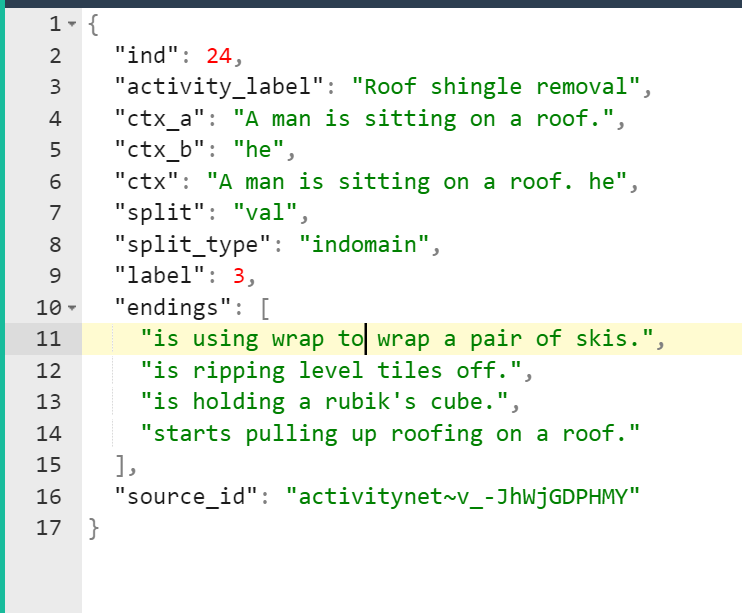

In [ ]:
# run the training loop
from torch.distributed import init_process_group, destroy_process_group
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")

# added after video, pytorch can be serious about it's device vs. device_type distinction
device_type = "cuda" if device.startswith("cuda") else "cpu"

torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Below are the best values
# total_batch_size = 524288 # 2**19, ~0.5M, in number of tokens
# B = 64 # micro batch size
# T = 1024 # sequence length

total_batch_size = 2*4*1024 # 2**19, ~0.5M, in number of tokens
B = 4 # micro batch size
T = 1024 # sequence length

assert total_batch_size % (B * T * ddp_world_size) == 0, "make sure total_batch_size is divisible by B * T * ddp_world_size"
grad_accum_steps = total_batch_size // (B * T * ddp_world_size)
if master_process:
    print(f"total desired batch size: {total_batch_size}")
    print(f"=> calculated gradient accumulation steps: {grad_accum_steps}")

train_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="train")
val_loader = DataLoaderLite(B=B, T=T, process_rank=ddp_rank, num_processes=ddp_world_size, split="val")

torch.set_float32_matmul_precision('high')

# create model
model = GPT(GPTConfig(vocab_size=50304))
# model = GPT.from_pretrained("gpt2") # or init from OpenAI GPT-2
model.to(device)
use_compile = False # torch.compile interferes with HellaSwag eval and Generation. TODO fix
if use_compile:
    model = torch.compile(model)
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
raw_model = model.module if ddp else model # always contains the "raw" unwrapped model

max_lr = 6e-4
min_lr = max_lr * 0.1
# Below are the best values
# warmup_steps = 715
# max_steps = 19073 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

warmup_steps = 5
max_steps = 20 # 19,073 steps is ~1 epoch, if data is 10B tokens and batch size 0.5M tokens

def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # 2) if it > lr_decay_iters, return min learning rate
    if it > max_steps:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff starts at 1 and goes to 0
    return min_lr + coeff * (max_lr - min_lr)

# optimize!
optimizer = raw_model.configure_optimizers(weight_decay=0.1, learning_rate=6e-4, device_type=device_type)

# create the log directory we will write checkpoints to and log to
log_dir = "log"
os.makedirs(log_dir, exist_ok=True)
log_file = os.path.join(log_dir, f"log.txt")
with open(log_file, "w") as f: # open for writing to clear the file
    pass

using device: cuda
total desired batch size: 8192
=> calculated gradient accumulation steps: 2
found 82 shards for split train
found 1 shards for split val
num decayed parameter tensors: 50, with 124,354,560 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


In [ ]:
for step in range(max_steps):
    t0 = time.time()
    last_step = (step == max_steps - 1)

    # once in a while evaluate our validation loss
    if step > 0 and (step % 10 == 0 or last_step):
        model.eval()
        val_loader.reset()
        with torch.no_grad():
            val_loss_accum = 0.0
            val_loss_steps = 20
            for _ in range(val_loss_steps):
                x, y = val_loader.next_batch()
                x, y = x.to(device), y.to(device)
                with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
                    logits, loss = model(x, y)
                loss = loss / val_loss_steps
                val_loss_accum += loss.detach()
        if ddp:
            dist.all_reduce(val_loss_accum, op=dist.ReduceOp.AVG)
        if master_process:
            print(f"validation loss: {val_loss_accum.item():.4f}")
            with open(log_file, "a") as f:
                f.write(f"{step} val {val_loss_accum.item():.4f}\n")
            if step > 0 and (step % 5000 == 0 or last_step):
                # optionally write model checkpoints
                checkpoint_path = os.path.join(log_dir, f"model_{step:05d}.pt")
                checkpoint = {
                    'model': raw_model.state_dict(),
                    'config': raw_model.config,
                    'step': step,
                    'val_loss': val_loss_accum.item()
                }
                # you might also want to add optimizer.state_dict() and
                # rng seeds etc., if you wanted to more exactly resume training
                torch.save(checkpoint, checkpoint_path)

    # once in a while evaluate hellaswag
    if (step > 0 and (step % 10 == 0 or last_step)) and (not use_compile):
        num_correct_norm = 0
        num_total = 0
        for i, example in enumerate(iterate_examples("val")):
            # only process examples where i % ddp_world_size == ddp_rank
            if i % ddp_world_size != ddp_rank:
                continue
            # render the example into tokens and labels
            _, tokens, mask, label = render_example(example)
            tokens = tokens.to(device)
            mask = mask.to(device)
            # get the logits
            with torch.no_grad():
                with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
                    logits, loss = model(tokens)
                pred_norm = get_most_likely_row(tokens, mask, logits)
            num_total += 1
            num_correct_norm += int(pred_norm == label)

            # For Demo Only
            if i>50:
                break
        # reduce the stats across all processes
        if ddp:
            num_total = torch.tensor(num_total, dtype=torch.long, device=device)
            num_correct_norm = torch.tensor(num_correct_norm, dtype=torch.long, device=device)
            dist.all_reduce(num_total, op=dist.ReduceOp.SUM)
            dist.all_reduce(num_correct_norm, op=dist.ReduceOp.SUM)
            num_total = num_total.item()
            num_correct_norm = num_correct_norm.item()
        acc_norm = num_correct_norm / num_total
        if master_process:
            print(f"HellaSwag accuracy: {num_correct_norm}/{num_total}={acc_norm:.4f}")
            with open(log_file, "a") as f:
                f.write(f"{step} hella {acc_norm:.4f}\n")

    # once in a while generate from the model (except step 0, which is noise)
    if ((step > 0 and step % 10 == 0) or last_step) and (not use_compile):
        model.eval()
        num_return_sequences = 4
        max_length = 32
        tokens = enc.encode("Hello, I'm a language model,")
        tokens = torch.tensor(tokens, dtype=torch.long)
        tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)
        xgen = tokens.to(device)
        sample_rng = torch.Generator(device=device)
        sample_rng.manual_seed(42 + ddp_rank)
        while xgen.size(1) < max_length:
            # forward the model to get the logits
            with torch.no_grad():
                with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
                    logits, loss = model(xgen) # (B, T, vocab_size)
                # take the logits at the last position
                logits = logits[:, -1, :] # (B, vocab_size)
                # get the probabilities
                probs = F.softmax(logits, dim=-1)
                # do top-k sampling of 50 (huggingface pipeline default)
                # topk_probs here becomes (5, 50), topk_indices is (5, 50)
                topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
                # select a token from the top-k probabilities
                # note: multinomial does not demand the input to sum to 1
                ix = torch.multinomial(topk_probs, 1, generator=sample_rng) # (B, 1)
                # gather the corresponding indices
                xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
                # append to the sequence
                xgen = torch.cat((xgen, xcol), dim=1)
        # print the generated text
        for i in range(num_return_sequences):
            tokens = xgen[i, :max_length].tolist()
            decoded = enc.decode(tokens)
            print(f"rank {ddp_rank} sample {i}: {decoded}")

    # do one step of the optimization
    model.train()
    optimizer.zero_grad()
    loss_accum = 0.0
    for micro_step in range(grad_accum_steps):
        x, y = train_loader.next_batch()
        x, y = x.to(device), y.to(device)
        with torch.autocast(device_type=device_type, dtype=torch.bfloat16):
            logits, loss = model(x, y)
        # we have to scale the loss to account for gradient accumulation,
        # because the gradients just add on each successive backward().
        # addition of gradients corresponds to a SUM in the objective, but
        # instead of a SUM we want MEAN. Scale the loss here so it comes out right
        loss = loss / grad_accum_steps
        loss_accum += loss.detach()
        if ddp:
            model.require_backward_grad_sync = (micro_step == grad_accum_steps - 1)
        loss.backward()
    if ddp:
        dist.all_reduce(loss_accum, op=dist.ReduceOp.AVG)
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # determine and set the learning rate for this iteration
    lr = get_lr(step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.step()
    torch.cuda.synchronize() # wait for the GPU to finish work
    t1 = time.time()
    dt = t1 - t0 # time difference in seconds
    tokens_processed = train_loader.B * train_loader.T * grad_accum_steps * ddp_world_size
    tokens_per_sec = tokens_processed / dt
    if master_process:
        print(f"step {step:5d} | loss: {loss_accum.item():.6f} | lr {lr:.4e} | norm: {norm:.4f} | dt: {dt*1000:.2f}ms | tok/sec: {tokens_per_sec:.2f}")
        with open(log_file, "a") as f:
            f.write(f"{step} train {loss_accum.item():.6f}\n")

if ddp:
    destroy_process_group()

step     0 | loss: 10.927765 | lr 1.2000e-04 | norm: 17.2793 | dt: 2961.19ms | tok/sec: 2766.45
step     1 | loss: 10.203094 | lr 2.4000e-04 | norm: 5.5128 | dt: 2886.97ms | tok/sec: 2837.58
step     2 | loss: 9.729706 | lr 3.6000e-04 | norm: 2.5951 | dt: 2884.69ms | tok/sec: 2839.82
step     3 | loss: 9.472710 | lr 4.8000e-04 | norm: 2.1802 | dt: 2890.03ms | tok/sec: 2834.57
step     4 | loss: 9.175598 | lr 6.0000e-04 | norm: 2.0705 | dt: 2896.71ms | tok/sec: 2828.04
step     5 | loss: 8.919531 | lr 6.0000e-04 | norm: 1.8074 | dt: 2908.91ms | tok/sec: 2816.18
step     6 | loss: 8.797348 | lr 5.9410e-04 | norm: 1.9553 | dt: 2923.29ms | tok/sec: 2802.33
step     7 | loss: 8.419756 | lr 5.7666e-04 | norm: 1.3511 | dt: 2930.67ms | tok/sec: 2795.26
step     8 | loss: 8.513136 | lr 5.4843e-04 | norm: 1.3574 | dt: 2946.06ms | tok/sec: 2780.67
step     9 | loss: 8.103546 | lr 5.1067e-04 | norm: 0.9924 | dt: 2958.67ms | tok/sec: 2768.81
validation loss: 8.0462
HellaSwag accuracy: 9/52=0.1731
r

# Loss Accumulation

In [ ]:
import torch

# super simple little MLP
net = torch.nn.Sequential(
    torch.nn.Linear(16, 32),
    torch.nn.GELU(),
    torch.nn.Linear(32, 1)
)
torch.random.manual_seed(42)
x = torch.randn(4, 16)
y = torch.randn(4, 1)
net.zero_grad()
yhat = net(x)
loss = torch.nn.functional.mse_loss(yhat, y)
loss.backward()
print(net[0].weight.grad.view(-1)[:10])

# the loss objective here is (due to readuction='mean')
# L = 1/4 * [
#            (y[0] - yhat[0])**2 +
#            (y[1] - yhat[1])**2 +
#            (y[2] - yhat[2])**2 +
#            (y[3] - yhat[3])**2
#           ]
# NOTE: 1/4!

tensor([ 0.0823,  0.0157, -0.0091, -0.0100, -0.0128,  0.0099,  0.0360,  0.0486,
         0.0504,  0.0592])


In [ ]:
# now let's do it with grad_accum_steps of 4, and B=1
# the loss objective here is different because
# accumulation in gradient <---> SUM in loss
# i.e. we instead get:
# L0 = 1/4(y[0] - yhat[0])**2
# L1 = 1/4(y[1] - yhat[1])**2
# L2 = 1/4(y[2] - yhat[2])**2
# L3 = 1/4(y[3] - yhat[3])**2
# L = L0 + L1 + L2 + L3
# NOTE: the "normalizer" of 1/4 is lost
net.zero_grad()
for i in range(4):
    yhat = net(x[i])
    loss = torch.nn.functional.mse_loss(yhat, y[i])
    loss = loss / 4 # <-- have to add back the "normalizer"!
    loss.backward()
print(net[0].weight.grad.view(-1)[:10])

tensor([ 0.0823,  0.0157, -0.0091, -0.0100, -0.0128,  0.0099,  0.0360,  0.0486,
         0.0504,  0.0592])


# Post Training Analysis

Min Train Loss: 7.841491
Min Validation Loss: 7.9034
Max Hellaswag eval: 0.2308


<ipython-input-21-79a1efc40689>:62: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0.0, 4.0)


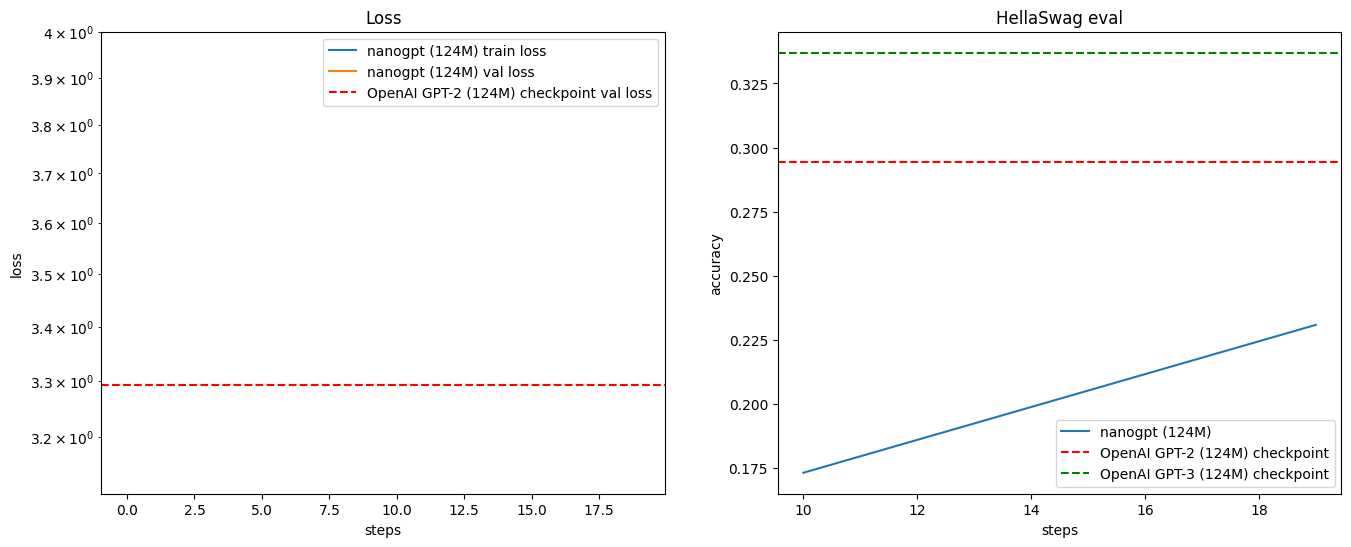

In [ ]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(0.0, 4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

Keep an eye on this repo for further updates: https://github.com/karpathy/build-nanogpt